# Mini Project 5: World Democracy and Freedom

### Learning Objective
Gaining experience in data preparation, unsupervised machine learning analysis, and visualisation of clusters.

### Project Objective
For the last 50 years the organisation Freedom House (https://freedomhouse.org) monitors and protects the democracy values, political rights and civil liberties in the world. We would like to get insights about the status of freedom of all countries in 2023.

## Tasks

### 1. Research the work of Freedom House and choose some of their data collections, relevant to the objective.

In [172]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [173]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [174]:
#df = pd.read_csv('/Users/emiliocastrolagunas/Desktop/Sem4/BI/Notebooks/Data/freedom.csv')
df= pd.read_csv('../excercises/Data/freedom.csv')



In [175]:
#idea of general looks of data
df.head()

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,4.5,6.5,6.5,6.5,6.5,6.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.5,5.5
1,Albania,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,Algeria,6.0,6.0,6.0,6.5,6.0,6.0,6.0,6.0,6.0,...,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5
3,Andorra,3.5,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Angola,NaN,NaN,NaN,6.0,6.0,7.0,7.0,7.0,7.0,...,5.5,5.5,5.5,5.5,5.5,5.5,6.0,6.0,6.0,5.5


In [176]:
df.shape

(193, 48)

In [177]:
#checking for null-values
df.isnull().sum()

country      0
1972        51
1973        50
1974        48
1975        42
1976        41
1977        45
1978        42
1979        39
1980        38
1981        36
1982       193
1983        35
1984        34
1985        34
1986        34
1987        34
1988        34
1989        33
1990        33
1991        14
1992        10
1993         5
1994         4
1995         4
1996         4
1997         4
1998         4
1999         3
2000         3
2001         3
2002         3
2003         3
2004         3
2005         3
2006         1
2007         1
2008         1
2009         1
2010         1
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
dtype: int64

### 2. Clean and explore the data and prepare it for clustering


In [ ]:
#def replace_zeros_and_nulls_with_median(df, column_name):.
#    non_zero_non_null_values = df[column_name][(df[column_name] != 0) & (~df[column_name].isnull())]
#    if not non_zero_non_null_values.empty:
#        median_value = non_zero_non_null_values.median()
#        df[column_name].fillna(median_value, inplace=True)
#    return df
#years_with_null=['1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']
#years_with_null
#for year_string in years_with_null:
     #replace_zeros_and_nulls_with_median(df, year_string)
        
#df.isnull().sum()

In [ ]:
#We would like to explore the differences between 2002 and 2018 as that's the closest to todays reality.
#The reason for that choice, is because 9/11 was in 2001. It could be interesting to see an potential impact from that.
#On top of that, there's few null values as seen above, so an accurate replacement of nulls is easier.


In [179]:
columns_to_include = [31, 47]

# Read the CSV file while including only the specified columns
dfa = pd.read_csv('../excercises/Data/freedom.csv', usecols=columns_to_include)
dfa.describe()

,2002,2018
count,190.000000,193.000000
mean,3.386842,3.422280
std,1.965061,2.031438
min,1.000000,1.000000
25%,1.500000,1.500000
50%,3.000000,3.000000
75%,5.500000,5.500000
max,7.000000,7.000000


In [180]:
median_2002 = dfa['2002'].median()
dfa['2002'].fillna(median_2002, inplace=True)
dfa.isnull().sum()

2002    0
2018    0
dtype: int64

In [181]:
dfa.head()

,2002,2018
0,6.0,5.5
1,3.0,3.0
2,5.5,5.5
3,1.0,1.0
4,5.5,5.5


### 3. Choose an unsupervised ML algorithm and apply it to create clusters of countries, based on their freedom assessment measure.

In [183]:
x=dfa
X=x.values
X

array([[6. , 5.5],
       [3. , 3. ],
       [5.5, 5.5],
       [1. , 1. ],
       [5.5, 5.5],
       [3. , 2. ],
       [3. , 2. ],
       [4. , 4. ],
       [1. , 1. ],
       [1. , 1. ],
       [5.5, 6.5],
       [1. , 1. ],
       [5. , 6.5],
       [4. , 5. ],
       [1. , 1. ],
       [6. , 6.5],
       [1. , 1. ],
       [1.5, 1.5],
       [2.5, 2. ],
       [5.5, 3.5],
       [2.5, 3. ],
       [4. , 4. ],
       [2. , 2.5],
       [2.5, 2. ],
       [5.5, 5.5],
       [1.5, 2. ],
       [4. , 3.5],
       [5.5, 6.5],
       [5.5, 5.5],
       [6. , 6. ],
       [1. , 1. ],
       [1.5, 1. ],
       [5. , 7. ],
       [5.5, 6.5],
       [1.5, 1. ],
       [6.5, 6.5],
       [4. , 3. ],
       [4.5, 4. ],
       [6. , 6.5],
       [5. , 6. ],
       [1.5, 1. ],
       [6. , 4. ],
       [2. , 1.5],
       [7. , 6.5],
       [1. , 1. ],
       [1.5, 1. ],
       [1. , 1. ],
       [4.5, 5.5],
       [1. , 1. ],
       [2. , 3. ],
       [3. , 3. ],
       [6. , 6. ],
       [2.5,

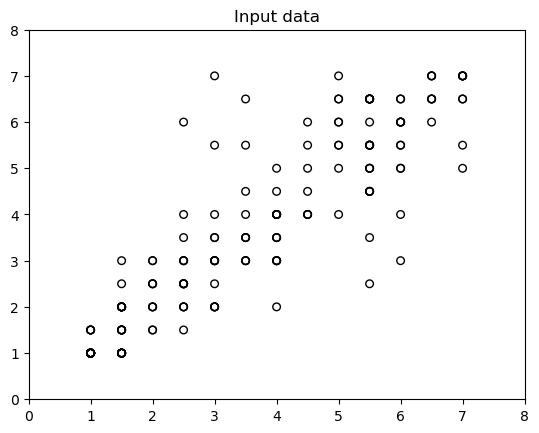

In [184]:
# Plot the input data
# a. creates a frame
plt.figure()
plt.title('Input data')

# b. get the range of X and Y (long way)
# first column
x_min = X[:,0].min()
x_max = X[:,0].max()

# second column
y_min = X[:,1].min()
y_max = X[:,1].max()

# same as above: get the range of X and Y (shorter way)
# x_min, x_max = X[:,0].min(), X[:,0].max()
# y_min, y_max = X[:,1].min(), X[:,1].max()

# c. set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# scatterplot of the points
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

In [185]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
print("Distortion: ", distortions)

C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Distortion:  [1.2573292914038683, 0.889557187134443, 0.7505793480800359, 0.651011705310853, 0.6019597531417885, 0.5545899877753973, 0.4899085065121371, 0.48149804296791504]


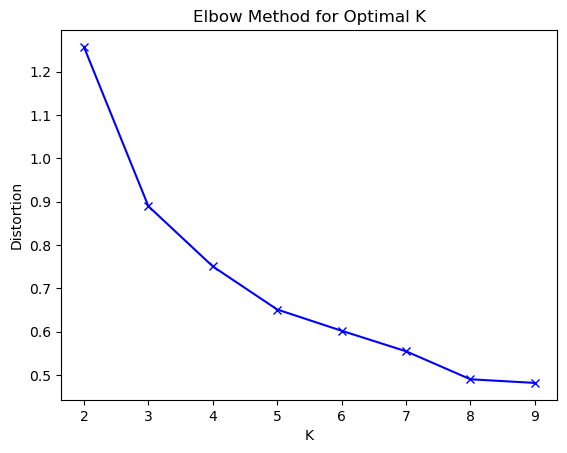

In [186]:
# Plot the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)

In [223]:
num_clusters=3

In [224]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [225]:
# Train the KMeans clustering model
kmeans.fit(X)

C:\Users\Johan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=20)

In [226]:
# Predict 5 clusters in X
y = kmeans.predict(X)
y

array([0, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1,
       1, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2,
       1, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1,
       1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1,
       1, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 1,
       2, 2, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0])

In [227]:
# See the predicted labels of clusters
# cluster labels are stored in variable 'kmeans.labels_'
print(kmeans.labels_)

# same as print(Y)

[0 2 0 1 0 1 1 2 1 1 0 1 0 2 1 0 1 1 1 2 2 2 1 1 0 1 2 0 0 0 1 1 0 0 1 0 2
 2 0 0 1 0 1 0 1 1 1 0 1 1 2 0 1 0 0 1 0 0 2 1 1 0 2 2 1 1 1 1 2 0 2 1 0 2
 1 1 1 2 0 0 1 1 1 1 1 0 0 2 1 2 0 0 1 0 2 2 0 1 1 1 2 2 2 0 2 1 1 0 1 1 1
 2 1 1 2 0 2 0 1 1 2 1 1 2 2 2 0 2 1 0 0 1 1 2 2 1 2 1 1 0 1 0 0 1 1 1 0 1
 2 2 2 2 1 1 1 0 1 1 0 1 2 1 1 1 0 1 1 1 0 0 2 2 2 0 2 1 2 2 0 1 0 2 0 1 1
 1 0 1 0 0 0 2 0]


Cluster  0 :  (59, 2)


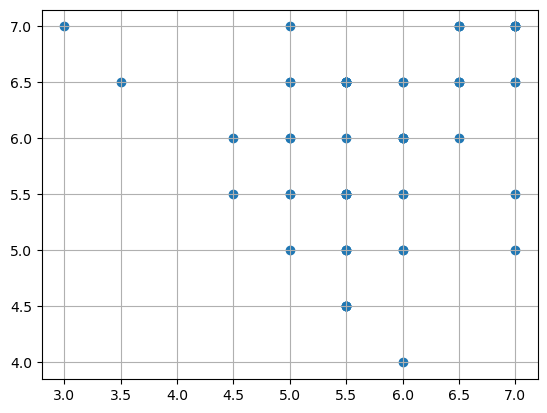

Cluster  1 :  (85, 2)


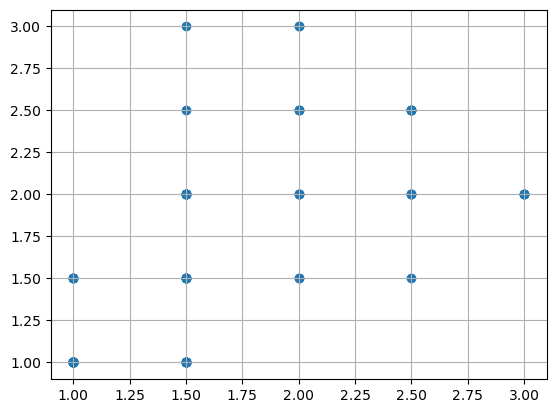

Cluster  2 :  (49, 2)


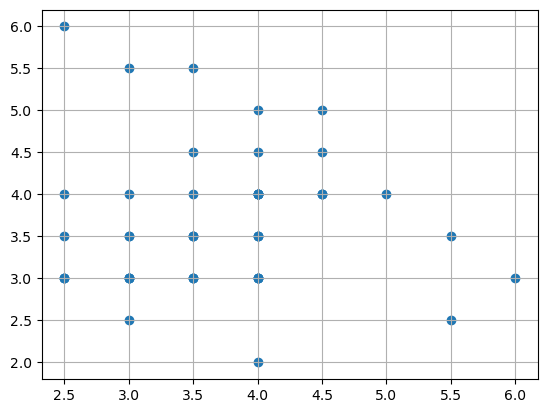

In [228]:
# Split the clusters, for demo purpose only
for i in range(num_clusters):
    # slice the cluster
    cluster = X[y == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster[:, 0], cluster[:, 1])   
    plt.grid(True)
    plt.show()

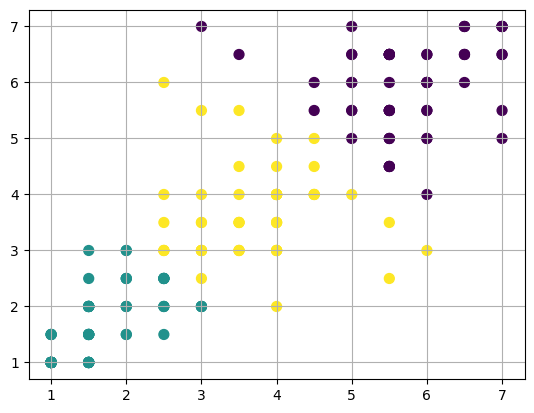

In [229]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

plt.grid(True)
plt.show()

In [230]:
# See the cluster centres, created during the clustering
# cluster centres are stored in a variable named 'cluster_centers_'
print(kmeans.cluster_centers_)

[[5.76271186 5.96610169]
 [1.53529412 1.51764706]
 [3.71428571 3.66326531]]


In [231]:
# we need a grid of points for drawing a smooth border between clusters
# define step size of the mesh 
step_size = 0.01

# we need to cover all points of our data
# create a grid out of an array of X values and an array of y values
x_coord = np.arange(x_min, x_max, step_size)
y_coord = np.arange(y_min, y_max, step_size)

# meshgrid() creates a matrix of coordinates from the two vectors of coordinates
x_vals, y_vals = np.meshgrid(x_coord, y_coord)

In [232]:
# Predict cluster labels for all the points on the grid 
# ravel() returns 1D-array
xx = x_vals.ravel()
yy = y_vals.ravel()

# np.c_ concatenates the arguments
labels = kmeans.predict(np.c_[xx,yy])
print(labels)
labels = labels.reshape(x_vals.shape)

[1 1 1 ... 0 0 0]


In [233]:
# Predict cluster labels for all the points on the grid 
# ravel() returns 1D-array
#xx = x_vals.ravel()
#yy = y_vals.ravel()

# np.c_ concatenates the arguments
#labels = kmeans.predict(np.c_[xx,yy])
#labels = labels.reshape(x_vals.shape)

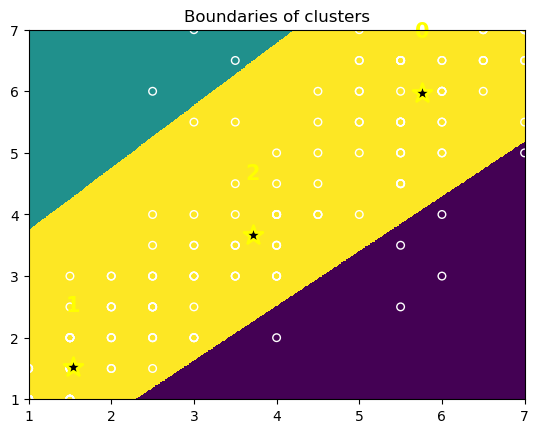

In [234]:
# Plot the clusters
# create new plot area
plt.figure()
# clear the plot area
plt.clf()

plt.title('Boundaries of clusters')

# plot the frame
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot the clusters 
plt.imshow(labels, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
           cmap='viridis', aspect='auto')
# plot the points as they belong to the clusters
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='white', s=30) 

# plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],  s=200, linewidths=2, color='yellow', marker='*', zorder=3, facecolors='black')

# annotate the centroids
for i, center in enumerate(centers):
    plt.annotate(i, center+[0.0,1.0], 
                 size=15, zorder=1, color='yellow', weight='bold', 
                 horizontalalignment='center', verticalalignment='center',) 
plt.show()

### 4. Create a geographical map of the world and colours the countries on it to reflect on their freedom status (cluster).